In [1]:
import json
import pandas as pd

In [2]:
file = 'compoundV2_transactions_ethereum_chunk_0.json'

In [3]:
with open(file,'r') as f:
    data= json.load(f)

In [4]:
transaction_types=list(data.keys())
print(list(data.keys()))

['deposits', 'withdraws', 'borrows', 'repays', 'liquidates']


In [5]:
for t_type in transaction_types:
    if len(data[t_type]) > 0:
        if t_type in data and isinstance(data[t_type],list):
            print(json.dumps(data[t_type][0], indent=2))

{
  "account": {
    "id": "0x502cb8985b2c92a8d4bf309cdaa89de9be442708"
  },
  "amount": "10000000000000000",
  "amountUSD": "1.78010000000000014408",
  "asset": {
    "id": "0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee",
    "symbol": "ETH"
  },
  "hash": "0xa1b27194b198762eaa631564fea76008b363c157a1ccf9df5f1338b7c566fd3a",
  "id": "0xa1b27194b198762eaa631564fea76008b363c157a1ccf9df5f1338b7c566fd3a-69",
  "timestamp": "1557193282"
}
{
  "account": {
    "id": "0xa9ee140bfe20a7a5f9e170c6e89ec4b0906d297d"
  },
  "amount": "10000099227753878",
  "amountUSD": "1.670143911178463392349813005223923",
  "asset": {
    "id": "0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee",
    "symbol": "ETH"
  },
  "hash": "0x2cd6851aaaff508ed416f4d562fd2ac6f75e34d069a94e65eb3239d7e05181db",
  "id": "0x2cd6851aaaff508ed416f4d562fd2ac6f75e34d069a94e65eb3239d7e05181db-79",
  "timestamp": "1557289469"
}
{
  "account": {
    "id": "0x502cb8985b2c92a8d4bf309cdaa89de9be442708"
  },
  "amount": "100000000000000000000",
 

In [6]:
from glob import glob

In [7]:
file_paths = ['compoundV2_transactions_ethereum_chunk_0.json', 'compoundV2_transactions_ethereum_chunk_1.json', 'compoundV2_transactions_ethereum_chunk_2.json']

In [8]:
all_deposits = []
all_withdraws = []
all_borrows = []
all_repays = []
all_liquidates = []

In [9]:
transaction_type_map = {
    "deposits": all_deposits,
    "withdraws": all_withdraws,
    "borrows": all_borrows,
    "repays": all_repays,
    "liquidates": all_liquidates
}

In [10]:
for path in file_paths:
    with open(path,'r') as f:
        data=json.load(f)
        for t_type,target_list in transaction_type_map.items():
            if t_type in data and isinstance(data[t_type],list):
                target_list.extend(data[t_type])

In [11]:
df_deposits= pd.DataFrame(all_deposits)

In [12]:
df_deposits.head()

,account,amount,amountUSD,asset,hash,id,timestamp
0,{'id': '0x502cb8985b2c92a8d4bf309cdaa89de9be44...,10000000000000000,1.78010000000000014408,{'id': '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,0xa1b27194b198762eaa631564fea76008b363c157a1cc...,0xa1b27194b198762eaa631564fea76008b363c157a1cc...,1557193282
1,{'id': '0xc8355d0e2c265b2fe495ebbc0fc9ad992b40...,80000000000000000,14.24080000000000115264,{'id': '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,0x1d2000c49507d94ef42ec995e1ea59b41e61bf0c63d4...,0x1d2000c49507d94ef42ec995e1ea59b41e61bf0c63d4...,1557193511
2,{'id': '0x502cb8985b2c92a8d4bf309cdaa89de9be44...,4582920657824222640301,1562.320140205329756474017145956277,{'id': '0x0d8775f648430679a709e98d2b0cb6250d28...,0x4c3b59d70f6205a16f4d6f4c960d22ad332dd740720a...,0x4c3b59d70f6205a16f4d6f4c960d22ad332dd740720a...,1557195125
3,{'id': '0x502cb8985b2c92a8d4bf309cdaa89de9be44...,4013962940167102266494,4013.962940167102266494,{'id': '0x89d24a6b4ccb1b6faa2625fe562bdd9a2326...,0xe8b31ff5cf7252a1a496dadfeccef667577d88cdf2c4...,0xe8b31ff5cf7252a1a496dadfeccef667577d88cdf2c4...,1557195125
4,{'id': '0x502cb8985b2c92a8d4bf309cdaa89de9be44...,9990000000000000000,1775.4727500000001641357,{'id': '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,0x0eda39d1cb1844e8c2f659219f5a414c0b8261e6dee5...,0x0eda39d1cb1844e8c2f659219f5a414c0b8261e6dee5...,1557196912


In [13]:
df_deposits['wallet'] = df_deposits['account'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)

In [14]:
df_deposits['wallet'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: wallet, Length: 30000, dtype: bool

In [15]:
df_deposits['asset_symbol'] = df_deposits['asset'].apply(lambda x: x['symbol'] if isinstance(x, dict) and 'symbol' in x else None)
df_deposits['asset_id'] = df_deposits['asset'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)
df_deposits['amount'] = pd.to_numeric(df_deposits['amount'], errors='coerce')
df_deposits['amountUSD'] = pd.to_numeric(df_deposits['amountUSD'], errors='coerce')
df_deposits['timestamp'] = pd.to_datetime(df_deposits['timestamp'], unit='s', errors='coerce')
# im keeping only relevant columns and add transaction type
df_deposits = df_deposits[['timestamp', 'wallet', 'amount', 'amountUSD', 'asset_symbol', 'asset_id', 'hash', 'id']].copy()
df_deposits['transaction_type'] = 'deposit'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11796\638147570.py:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_deposits['timestamp'] = pd.to_datetime(df_deposits['timestamp'], unit='s', errors='coerce')


In [16]:
df_deposits.head()

,timestamp,wallet,amount,amountUSD,asset_symbol,asset_id,hash,id,transaction_type
0,2019-05-07 01:41:22,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.000000e+16,1.78010,ETH,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0xa1b27194b198762eaa631564fea76008b363c157a1cc...,0xa1b27194b198762eaa631564fea76008b363c157a1cc...,deposit
1,2019-05-07 01:45:11,0xc8355d0e2c265b2fe495ebbc0fc9ad992b40dc8f,8.000000e+16,14.24080,ETH,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x1d2000c49507d94ef42ec995e1ea59b41e61bf0c63d4...,0x1d2000c49507d94ef42ec995e1ea59b41e61bf0c63d4...,deposit
2,2019-05-07 02:12:05,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,4.582921e+21,1562.32014,BAT,0x0d8775f648430679a709e98d2b0cb6250d2887ef,0x4c3b59d70f6205a16f4d6f4c960d22ad332dd740720a...,0x4c3b59d70f6205a16f4d6f4c960d22ad332dd740720a...,deposit
3,2019-05-07 02:12:05,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,4.013963e+21,4013.96294,DAI,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,0xe8b31ff5cf7252a1a496dadfeccef667577d88cdf2c4...,0xe8b31ff5cf7252a1a496dadfeccef667577d88cdf2c4...,deposit
4,2019-05-07 02:41:52,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,9.990000e+18,1775.47275,ETH,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x0eda39d1cb1844e8c2f659219f5a414c0b8261e6dee5...,0x0eda39d1cb1844e8c2f659219f5a414c0b8261e6dee5...,deposit


In [17]:
df_deposits.isna()

,timestamp,wallet,amount,amountUSD,asset_symbol,asset_id,hash,id,transaction_type
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False


In [18]:
df_borrows = pd.DataFrame(all_borrows)

In [19]:
df_borrows['wallet'] = df_borrows['account'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)


In [20]:
df_borrows.head()    

,account,amount,amountUSD,asset,hash,id,timestamp,wallet
0,{'id': '0x502cb8985b2c92a8d4bf309cdaa89de9be44...,100000000000000000000,27.7974340750000025,{'id': '0xe41d2489571d322189246dafa5ebde1f4699...,0xcb748609bdfba30ebe1e4a81b861048a0e3e3d7dad13...,0xcb748609bdfba30ebe1e4a81b861048a0e3e3d7dad13...,1557197308,0x502cb8985b2c92a8d4bf309cdaa89de9be442708
1,{'id': '0x502cb8985b2c92a8d4bf309cdaa89de9be44...,200000000000000000000,68.1801085750000062,{'id': '0x0d8775f648430679a709e98d2b0cb6250d28...,0x507ac33d416bfdae472ab83fab83f6c898cbc97b91a0...,0x507ac33d416bfdae472ab83fab83f6c898cbc97b91a0...,1557197447,0x502cb8985b2c92a8d4bf309cdaa89de9be442708
2,{'id': '0x502cb8985b2c92a8d4bf309cdaa89de9be44...,1000000000000000000,177.72500000000001643,{'id': '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,0x3c0b9a20a119b1a49f1ea105a35fa93e5fca81560ceb...,0x3c0b9a20a119b1a49f1ea105a35fa93e5fca81560ceb...,1557197497,0x502cb8985b2c92a8d4bf309cdaa89de9be442708
3,{'id': '0xa7ff0d561cd15ed525e31bbe0af3fe34ac20...,300000000000000,0.053184750000000002415,{'id': '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,0xbe60c4a7d2add6bf703a09b0b111a1e70014acf1e82c...,0xbe60c4a7d2add6bf703a09b0b111a1e70014acf1e82c...,1557204933,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6
4,{'id': '0xbd9ed130a53cfafcf81502e4d35329a6c4d5...,2000000000000000000,0.671686673775000014,{'id': '0x0d8775f648430679a709e98d2b0cb6250d28...,0x40baa23ee06935a2e7e868f54e4de15a4a0b73b83627...,0x40baa23ee06935a2e7e868f54e4de15a4a0b73b83627...,1557217208,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410


In [21]:
df_borrows['asset_symbol'] = df_borrows['asset'].apply(lambda x: x['symbol'] if isinstance(x, dict) and 'symbol' in x else None)
df_borrows['asset_id'] = df_borrows['asset'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)
df_borrows['amount'] = pd.to_numeric(df_borrows['amount'], errors='coerce')
df_borrows['amountUSD'] = pd.to_numeric(df_borrows['amountUSD'], errors='coerce')
df_borrows['timestamp'] = pd.to_datetime(df_borrows['timestamp'], unit='s', errors='coerce')
df_borrows = df_borrows[['timestamp', 'wallet', 'amount', 'amountUSD', 'asset_symbol', 'asset_id', 'hash', 'id']].copy()
df_borrows['transaction_type'] = 'borrow'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11796\828235821.py:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_borrows['timestamp'] = pd.to_datetime(df_borrows['timestamp'], unit='s', errors='coerce')


In [22]:
df_borrows.head()

,timestamp,wallet,amount,amountUSD,asset_symbol,asset_id,hash,id,transaction_type
0,2019-05-07 02:48:28,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.000000e+20,27.797434,ZRX,0xe41d2489571d322189246dafa5ebde1f4699f498,0xcb748609bdfba30ebe1e4a81b861048a0e3e3d7dad13...,0xcb748609bdfba30ebe1e4a81b861048a0e3e3d7dad13...,borrow
1,2019-05-07 02:50:47,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,2.000000e+20,68.180109,BAT,0x0d8775f648430679a709e98d2b0cb6250d2887ef,0x507ac33d416bfdae472ab83fab83f6c898cbc97b91a0...,0x507ac33d416bfdae472ab83fab83f6c898cbc97b91a0...,borrow
2,2019-05-07 02:51:37,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.000000e+18,177.725000,ETH,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x3c0b9a20a119b1a49f1ea105a35fa93e5fca81560ceb...,0x3c0b9a20a119b1a49f1ea105a35fa93e5fca81560ceb...,borrow
3,2019-05-07 04:55:33,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,3.000000e+14,0.053185,ETH,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0xbe60c4a7d2add6bf703a09b0b111a1e70014acf1e82c...,0xbe60c4a7d2add6bf703a09b0b111a1e70014acf1e82c...,borrow
4,2019-05-07 08:20:08,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,2.000000e+18,0.671687,BAT,0x0d8775f648430679a709e98d2b0cb6250d2887ef,0x40baa23ee06935a2e7e868f54e4de15a4a0b73b83627...,0x40baa23ee06935a2e7e868f54e4de15a4a0b73b83627...,borrow


In [23]:
df_repays = pd.DataFrame(all_repays)

In [24]:
df_repays.head()

,account,amount,amountUSD,asset,hash,id,timestamp
0,{'id': '0xb3fbe25be2e8ca097e9ac924e94af000dd3a...,1227714,1.227714,{'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...,0x1d8253fee27e0114edab95942f84dded401015f8e7a0...,0x1d8253fee27e0114edab95942f84dded401015f8e7a0...,1557291692
1,{'id': '0xb3fbe25be2e8ca097e9ac924e94af000dd3a...,30015084,30.015084,{'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...,0x95228bc9933463d84f1d36d4f692f5ace9b6c31d0cad...,0x95228bc9933463d84f1d36d4f692f5ace9b6c31d0cad...,1557292366
2,{'id': '0x4654f56a64301b9b582f843f97332d96ead1...,1000000000000000000,0.312949126388418181,{'id': '0x0d8775f648430679a709e98d2b0cb6250d28...,0x80f6db0469ca69eadeb96dca086f20c77ca05ff65d81...,0x80f6db0469ca69eadeb96dca086f20c77ca05ff65d81...,1557358368
3,{'id': '0x6361c73de2e382899c040923a1af481ea927...,229755873344502596,0.06500690804557349575701830822480581,{'id': '0x0d8775f648430679a709e98d2b0cb6250d28...,0x4499e858aad19658c8418b1020536e8dd11857323dfa...,0x4499e858aad19658c8418b1020536e8dd11857323dfa...,1557427492
4,{'id': '0x6361c73de2e382899c040923a1af481ea927...,229755873344502596,0.06500690804557349575701830822480581,{'id': '0x0d8775f648430679a709e98d2b0cb6250d28...,0x4499e858aad19658c8418b1020536e8dd11857323dfa...,0x4499e858aad19658c8418b1020536e8dd11857323dfa...,1557427492


In [25]:
df_repays['wallet'] = df_repays['account'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)
df_repays['asset_symbol'] = df_repays['asset'].apply(lambda x: x['symbol'] if isinstance(x, dict) and 'symbol' in x else None)
df_repays['asset_id'] = df_repays['asset'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)
df_repays['amount'] = pd.to_numeric(df_repays['amount'], errors='coerce')
df_repays['amountUSD'] = pd.to_numeric(df_repays['amountUSD'], errors='coerce')
df_repays['timestamp'] = pd.to_datetime(df_repays['timestamp'], unit='s', errors='coerce')
df_repays = df_repays[['timestamp', 'wallet', 'amount', 'amountUSD', 'asset_symbol', 'asset_id', 'hash', 'id']].copy()
df_repays['transaction_type'] = 'repay'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11796\1281866653.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_repays['timestamp'] = pd.to_datetime(df_repays['timestamp'], unit='s', errors='coerce')


In [26]:
df_repays.head()

,timestamp,wallet,amount,amountUSD,asset_symbol,asset_id,hash,id,transaction_type
0,2019-05-08 05:01:32,0xb3fbe25be2e8ca097e9ac924e94af000dd3a5663,1.227714e+06,1.227714,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x1d8253fee27e0114edab95942f84dded401015f8e7a0...,0x1d8253fee27e0114edab95942f84dded401015f8e7a0...,repay
1,2019-05-08 05:12:46,0xb3fbe25be2e8ca097e9ac924e94af000dd3a5663,3.001508e+07,30.015084,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x95228bc9933463d84f1d36d4f692f5ace9b6c31d0cad...,0x95228bc9933463d84f1d36d4f692f5ace9b6c31d0cad...,repay
2,2019-05-08 23:32:48,0x4654f56a64301b9b582f843f97332d96ead11ff8,1.000000e+18,0.312949,BAT,0x0d8775f648430679a709e98d2b0cb6250d2887ef,0x80f6db0469ca69eadeb96dca086f20c77ca05ff65d81...,0x80f6db0469ca69eadeb96dca086f20c77ca05ff65d81...,repay
3,2019-05-09 18:44:52,0x6361c73de2e382899c040923a1af481ea927cf20,2.297559e+17,0.065007,BAT,0x0d8775f648430679a709e98d2b0cb6250d2887ef,0x4499e858aad19658c8418b1020536e8dd11857323dfa...,0x4499e858aad19658c8418b1020536e8dd11857323dfa...,repay
4,2019-05-09 18:44:52,0x6361c73de2e382899c040923a1af481ea927cf20,2.297559e+17,0.065007,BAT,0x0d8775f648430679a709e98d2b0cb6250d2887ef,0x4499e858aad19658c8418b1020536e8dd11857323dfa...,0x4499e858aad19658c8418b1020536e8dd11857323dfa...,repay


In [27]:
df_liquidates = pd.DataFrame(all_liquidates)

In [28]:
df_liquidates['liquidator_wallet'] = df_liquidates['liquidator'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)
df_liquidates['liquidatee_wallet'] = df_liquidates['liquidatee'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)
df_liquidates['asset_symbol'] = df_liquidates['asset'].apply(lambda x: x['symbol'] if isinstance(x, dict) and 'symbol' in x else None) # This is the repaid (borrowed) asset
df_liquidates['asset_id'] = df_liquidates['asset'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)
df_liquidates['amount'] = pd.to_numeric(df_liquidates['amount'], errors='coerce') # Amount of borrowed asset repaid
df_liquidates['amountUSD'] = pd.to_numeric(df_liquidates['amountUSD'], errors='coerce')
df_liquidates['timestamp'] = pd.to_datetime(df_liquidates['timestamp'], unit='s', errors='coerce')
df_liquidates = df_liquidates[['timestamp', 'liquidator_wallet', 'liquidatee_wallet', 'amount', 'amountUSD', 'asset_symbol', 'asset_id', 'hash', 'id']].copy()
df_liquidates['transaction_type'] = 'liquidate'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11796\406235955.py:7: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_liquidates['timestamp'] = pd.to_datetime(df_liquidates['timestamp'], unit='s', errors='coerce')


In [29]:
df_liquidates['liquidatee_wallet'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
20732    False
20733    False
20734    False
20735    False
20736    False
Name: liquidatee_wallet, Length: 20737, dtype: bool

In [30]:
df_withdraws = pd.DataFrame(all_withdraws)


In [31]:
df_withdraws['wallet'] = df_withdraws['account'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)
df_withdraws['asset_symbol'] = df_withdraws['asset'].apply(lambda x: x['symbol'] if isinstance(x, dict) and 'symbol' in x else None)
df_withdraws['asset_id'] = df_withdraws['asset'].apply(lambda x: x['id'] if isinstance(x, dict) and 'id' in x else None)
df_withdraws['amount'] = pd.to_numeric(df_withdraws['amount'], errors='coerce')
df_withdraws['amountUSD'] = pd.to_numeric(df_withdraws['amountUSD'], errors='coerce')
df_withdraws['timestamp'] = pd.to_datetime(df_withdraws['timestamp'], unit='s', errors='coerce')
df_withdraws = df_withdraws[['timestamp', 'wallet', 'amount', 'amountUSD', 'asset_symbol', 'asset_id', 'hash', 'id']].copy()
df_withdraws['transaction_type'] = 'withdraw'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11796\3374175106.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_withdraws['timestamp'] = pd.to_datetime(df_withdraws['timestamp'], unit='s', errors='coerce')


In [32]:
dataframes = {
    "Deposits": df_deposits,
    "Withdraws": df_withdraws,
    "Borrows": df_borrows,
    "Repays": df_repays,
    "Liquidates": df_liquidates
}

In [33]:
for name, df in dataframes.items():
    if not df.empty:
        print(f"\n{name} DataFrame")
        print(f"Shape: {df.shape}")
        print("Head:")
        print(df.head())
        print("\nInfo:")
        df.info()
    


Deposits DataFrame
Shape: (30000, 9)
Head:
            timestamp                                      wallet  \
0 2019-05-07 01:41:22  0x502cb8985b2c92a8d4bf309cdaa89de9be442708   
1 2019-05-07 01:45:11  0xc8355d0e2c265b2fe495ebbc0fc9ad992b40dc8f   
2 2019-05-07 02:12:05  0x502cb8985b2c92a8d4bf309cdaa89de9be442708   
3 2019-05-07 02:12:05  0x502cb8985b2c92a8d4bf309cdaa89de9be442708   
4 2019-05-07 02:41:52  0x502cb8985b2c92a8d4bf309cdaa89de9be442708   

         amount   amountUSD asset_symbol  \
0  1.000000e+16     1.78010          ETH   
1  8.000000e+16    14.24080          ETH   
2  4.582921e+21  1562.32014          BAT   
3  4.013963e+21  4013.96294          DAI   
4  9.990000e+18  1775.47275          ETH   

                                     asset_id  \
0  0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee   
1  0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee   
2  0x0d8775f648430679a709e98d2b0cb6250d2887ef   
3  0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359   
4  0xeeeeeeeeeeeeeeeeeeeeeeeeee

In [34]:
common_transactions = pd.concat([df_deposits, df_withdraws, df_borrows, df_repays], ignore_index=True)

In [35]:
common_transactions_df = common_transactions.sort_values(by=['wallet', 'timestamp'])

In [36]:
print(f"common combined transaction head \n: {common_transactions_df.head()}")


common combined transaction head 
:                 timestamp                                      wallet  \
43569 2019-08-14 17:21:40  0x00000000af5a61acaf76190794e3fdf1289288a1   
95444 2019-08-14 17:21:40  0x00000000af5a61acaf76190794e3fdf1289288a1   
43570 2019-08-14 17:21:58  0x00000000af5a61acaf76190794e3fdf1289288a1   
95445 2019-08-14 17:21:58  0x00000000af5a61acaf76190794e3fdf1289288a1   
43582 2019-08-14 17:22:30  0x00000000af5a61acaf76190794e3fdf1289288a1   

             amount   amountUSD asset_symbol  \
43569  9.942308e+17  184.392448          ETH   
95444  1.751409e+20  175.611855          DAI   
43570  9.929164e+17  184.148669          ETH   
95445  1.749093e+20  175.379685          DAI   
43582  1.164182e+18  215.912002          ETH   

                                         asset_id  \
43569  0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee   
95444  0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359   
43570  0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee   
95445  0x89d24a6b4ccb1b6

In [37]:
print(f"info: {common_transactions_df.info()}")


<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 43569 to 109315
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   timestamp         120000 non-null  datetime64[ns]
 1   wallet            120000 non-null  object        
 2   amount            120000 non-null  float64       
 3   amountUSD         120000 non-null  float64       
 4   asset_symbol      120000 non-null  object        
 5   asset_id          120000 non-null  object        
 6   hash              120000 non-null  object        
 7   id                120000 non-null  object        
 8   transaction_type  120000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 9.2+ MB
info: None


In [38]:
print(f"shape:{common_transactions_df.shape}")
print("\nUnique transaction types in common_transactions_df:")
print(common_transactions_df['transaction_type'].value_counts())

shape:(120000, 9)

Unique transaction types in common_transactions_df:
transaction_type
withdraw    30000
repay       30000
deposit     30000
borrow      30000
Name: count, dtype: int64


In [39]:
unique_wallets_common = common_transactions_df['wallet'].unique()
len(unique_wallets_common)

13484

In [40]:
unique_wallets_liquidator = df_liquidates['liquidator_wallet'].unique()
print(len(unique_wallets_liquidator))
unique_wallets_liquidatee = df_liquidates['liquidatee_wallet'].unique()
len(unique_wallets_liquidatee)

632


4936

In [41]:
all_unique_wallets = pd.Series(list(set(list(unique_wallets_common) + list(unique_wallets_liquidator) + list(unique_wallets_liquidatee)))).unique()
len(all_unique_wallets)

17644

In [42]:
wallet_features_list = []

In [43]:
grouped_common = common_transactions_df.groupby('wallet')

In [44]:
wallet_features = pd.DataFrame(index=all_unique_wallets)
wallet_features.index.name = 'wallet'

In [45]:
wallet_features['total_transactions'] = grouped_common.size().fillna(0)
wallet_features['first_seen_timestamp'] = grouped_common['timestamp'].min()
wallet_features['last_seen_timestamp'] = grouped_common['timestamp'].max()

In [46]:
delta = wallet_features['last_seen_timestamp']-wallet_features['first_seen_timestamp']


In [47]:
wallet_features['wallet_age_days'] = delta.dt.total_seconds() / (24 * 60 * 60)


In [48]:
wallet_features['wallet_age_days'] = wallet_features['wallet_age_days'].fillna(0)


In [49]:
wallet_features["wallet_age_days"].head()

wallet
0x504af2b739bd8cc1781933467ebb0fba59e182a5    60.601100
0xcf9060b126ed8995403d876e0f0bc3a1237bd8f9     0.213113
0xfa5d94a3baf66f0248b2b0d545964f71c6ea8844    27.884583
0xa16b9ff1793abe554a26a4a87fc9ba0533bd2d82     0.000000
0x2501dec16135d6b634f99bdeb3a0ee2123ed87c6     4.249167
Name: wallet_age_days, dtype: float64

In [50]:
wallet_features['active_days'] = grouped_common['timestamp'].apply(lambda x: x.dt.date.nunique()).fillna(0)


In [51]:
wallet_features['avg_txns_per_active_day']=(wallet_features['total_transactions']/wallet_features['active_days']).fillna(0)

In [52]:
wallet_features['avg_txns_per_active_day'].replace([float('inf'),float('-inf')],0,inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11796\3533613784.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wallet_features['avg_txns_per_active_day'].replace([float('inf'),float('-inf')],0,inplace=True)


In [53]:
wallet_features["distinct_assets_used_count"]=grouped_common['asset_symbol'].nunique().fillna(0)

In [54]:
wallet_features["distinct_assets_used_count"].head()

wallet
0x504af2b739bd8cc1781933467ebb0fba59e182a5    2.0
0xcf9060b126ed8995403d876e0f0bc3a1237bd8f9    2.0
0xfa5d94a3baf66f0248b2b0d545964f71c6ea8844    2.0
0xa16b9ff1793abe554a26a4a87fc9ba0533bd2d82    1.0
0x2501dec16135d6b634f99bdeb3a0ee2123ed87c6    1.0
Name: distinct_assets_used_count, dtype: float64

In [55]:
wallet_features.head()

,total_transactions,first_seen_timestamp,last_seen_timestamp,wallet_age_days,active_days,avg_txns_per_active_day,distinct_assets_used_count
wallet,,,,,,,
0x504af2b739bd8cc1781933467ebb0fba59e182a5,8.0,2019-08-11 11:38:57,2019-10-11 02:04:32,60.601100,4.0,2.0,2.0
0xcf9060b126ed8995403d876e0f0bc3a1237bd8f9,28.0,2019-07-30 03:28:00,2019-07-30 08:34:53,0.213113,1.0,28.0,2.0
0xfa5d94a3baf66f0248b2b0d545964f71c6ea8844,4.0,2019-07-25 23:24:12,2019-08-22 20:38:00,27.884583,2.0,2.0,2.0
0xa16b9ff1793abe554a26a4a87fc9ba0533bd2d82,1.0,2019-07-28 22:36:21,2019-07-28 22:36:21,0.000000,1.0,1.0,1.0
0x2501dec16135d6b634f99bdeb3a0ee2123ed87c6,4.0,2019-07-25 19:45:25,2019-07-30 01:44:13,4.249167,4.0,1.0,1.0


In [56]:
import numpy as np

def min_positive_usd(series):
    positive_values = series[series > 0]
    return positive_values.min() if not positive_values.empty else np.nan 

In [57]:
for txn_type in ['deposit', 'withdraw', 'borrow', 'repay']:
    txn_df = common_transactions_df[common_transactions_df['transaction_type'] == txn_type]
    grouped_txn = txn_df.groupby('wallet')

    wallet_features[f'{txn_type}_count'] = grouped_txn.size()
    wallet_features[f'total_{txn_type}_usd'] = grouped_txn['amountUSD'].sum()
    wallet_features[f'avg_{txn_type}_usd'] = grouped_txn['amountUSD'].mean()
    wallet_features[f'max_{txn_type}_usd'] = grouped_txn['amountUSD'].max()
    # Apply the custom function for min_positive_usd
    wallet_features[f'min_{txn_type}_usd'] = grouped_txn['amountUSD'].apply(min_positive_usd)

    if txn_type in ['deposit', 'borrow']:
         wallet_features[f'distinct_assets_{txn_type}ed_count'] = grouped_txn['asset_symbol'].nunique()
    wallet_features[f'last_{txn_type}_timestamp'] = grouped_txn['timestamp'].max()

In [58]:
cols_to_fill_zero_after_grouping = [
    'total_transactions', 'active_days', 'distinct_assets_used_count',
] + [f'{ttype}_{stat}' for ttype in ['deposit', 'withdraw', 'borrow', 'repay'] for stat in ['count', 'total_usd', 'avg_usd', 'max_usd', 'min_usd']] \
  + [f'distinct_assets_{ttype}ed_count' for ttype in ['deposit', 'borrow']]

In [59]:
for col in cols_to_fill_zero_after_grouping:
    if col in wallet_features.columns:
        wallet_features[col] = wallet_features[col].fillna(0)

In [60]:
wallet_features['avg_txns_per_active_day'] = (wallet_features['total_transactions'] / wallet_features['active_days']).fillna(0)
wallet_features['avg_txns_per_active_day'].replace([float('inf'), -float('inf'), np.inf, -np.inf], 0, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11796\4199406219.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wallet_features['avg_txns_per_active_day'].replace([float('inf'), -float('inf'), np.inf, -np.inf], 0, inplace=True)


In [61]:
wallet_features['net_deposit_usd'] = (wallet_features['total_deposit_usd'] - wallet_features['total_withdraw_usd'])
wallet_features['net_borrow_activity_usd'] = (wallet_features['total_borrow_usd'] - wallet_features['total_repay_usd'])

In [62]:
wallet_features['repay_to_borrow_ratio_usd'] = (wallet_features['total_repay_usd'] / wallet_features['total_borrow_usd'])
wallet_features['repay_to_borrow_ratio_usd'].replace([float('inf'), -float('inf'), np.inf, -np.inf], 0, inplace=True)
wallet_features['repay_to_borrow_ratio_usd'] = wallet_features['repay_to_borrow_ratio_usd'].fillna(0)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11796\13958745.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wallet_features['repay_to_borrow_ratio_usd'].replace([float('inf'), -float('inf'), np.inf, -np.inf], 0, inplace=True)


In [63]:
wallet_features['borrow_to_deposit_ratio_usd'] = (wallet_features['total_borrow_usd'] / wallet_features['total_deposit_usd'])
wallet_features['borrow_to_deposit_ratio_usd'].replace([float('inf'), -float('inf'), np.inf, -np.inf], 0, inplace=True)
wallet_features['borrow_to_deposit_ratio_usd'] = wallet_features['borrow_to_deposit_ratio_usd'].fillna(0)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11796\3277781612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wallet_features['borrow_to_deposit_ratio_usd'].replace([float('inf'), -float('inf'), np.inf, -np.inf], 0, inplace=True)


In [64]:
wallet_features['withdraw_to_deposit_ratio_usd'] = (wallet_features['total_withdraw_usd'] / wallet_features['total_deposit_usd'])
wallet_features['withdraw_to_deposit_ratio_usd'].replace([float('inf'), -float('inf'), np.inf, -np.inf], 0, inplace=True)
wallet_features['withdraw_to_deposit_ratio_usd'] = wallet_features['withdraw_to_deposit_ratio_usd'].fillna(0)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11796\312728698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wallet_features['withdraw_to_deposit_ratio_usd'].replace([float('inf'), -float('inf'), np.inf, -np.inf], 0, inplace=True)


In [65]:
liquidatee_counts=df_liquidates.groupby('liquidatee_wallet').size()
liquidatee_sum_usd=df_liquidates.groupby('liquidatee_wallet')['amountUSD'].sum()
wallet_features['times_liquidates_count']= wallet_features.index.map(liquidatee_counts).fillna(0)
wallet_features['total_usd_liquidated_as_liquidatee'] = wallet_features.index.map(liquidatee_sum_usd).fillna(0)


In [66]:
wallet_features['borrow_while_having_deposits_flag'] = ((wallet_features['borrow_count'] > 0) &
                                                        (wallet_features['deposit_count'] > 0)).astype(int)

In [67]:
small_txn_threshold = 10
# Ensure common_transactions_df has 'wallet' for groupby; it should
small_txns_count = common_transactions_df[common_transactions_df['amountUSD'] < small_txn_threshold].groupby('wallet').size()
wallet_features['small_usd_txns_count'] = wallet_features.index.map(small_txns_count).fillna(0)

In [68]:
wallet_features['percentage_small_usd_txns'] = (wallet_features['small_usd_txns_count'] / wallet_features['total_transactions'])
wallet_features['percentage_small_usd_txns'].replace([float('inf'), -float('inf'), np.inf, -np.inf], 0, inplace=True)
wallet_features['percentage_small_usd_txns'] = wallet_features['percentage_small_usd_txns'].fillna(0)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11796\3106248313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wallet_features['percentage_small_usd_txns'].replace([float('inf'), -float('inf'), np.inf, -np.inf], 0, inplace=True)


In [69]:
 current_time = common_transactions_df['timestamp'].max()
    # Ensure 'last_seen_timestamp' exists and is datetime before subtraction
if 'last_seen_timestamp' in wallet_features.columns and pd.api.types.is_datetime64_any_dtype(wallet_features['last_seen_timestamp']):
    wallet_features['days_since_last_activity'] = (current_time - wallet_features['last_seen_timestamp']).dt.total_seconds() / (24*60*60)
    # Fill NaNs for wallets that might not have a last_seen_timestamp (e.g., only in liquidations)
    # One strategy: fill with a large number (e.g., age of the entire dataset + 1 day) or 0 if that makes more sense.
    # Or fill with the maximum observed days_since_last_activity if some valid values exist.
    if wallet_features['days_since_last_activity'].notna().any():
         wallet_features['days_since_last_activity'] = wallet_features['days_since_last_activity'].fillna(wallet_features['days_since_last_activity'].max())
    else: # if all are NaT/NaN
        wallet_features['days_since_last_activity'] = (current_time - wallet_features['first_seen_timestamp'].min()).total_seconds() / (24*60*60) if wallet_features['first_seen_timestamp'].notna().any() else 0


else:
    print("'last_seen_timestamp' column is missing or not datetime. Skipping 'days_since_last_activity'.")
    wallet_features['days_since_last_activity'] = 0

In [70]:
numeric_cols = wallet_features.select_dtypes(include=np.number).columns
wallet_features[numeric_cols] = wallet_features[numeric_cols].fillna(0)

In [71]:
print("Head:")
print(wallet_features.head())

Head:
                                            total_transactions  \
wallet                                                           
0x504af2b739bd8cc1781933467ebb0fba59e182a5                 8.0   
0xcf9060b126ed8995403d876e0f0bc3a1237bd8f9                28.0   
0xfa5d94a3baf66f0248b2b0d545964f71c6ea8844                 4.0   
0xa16b9ff1793abe554a26a4a87fc9ba0533bd2d82                 1.0   
0x2501dec16135d6b634f99bdeb3a0ee2123ed87c6                 4.0   

                                           first_seen_timestamp  \
wallet                                                            
0x504af2b739bd8cc1781933467ebb0fba59e182a5  2019-08-11 11:38:57   
0xcf9060b126ed8995403d876e0f0bc3a1237bd8f9  2019-07-30 03:28:00   
0xfa5d94a3baf66f0248b2b0d545964f71c6ea8844  2019-07-25 23:24:12   
0xa16b9ff1793abe554a26a4a87fc9ba0533bd2d82  2019-07-28 22:36:21   
0x2501dec16135d6b634f99bdeb3a0ee2123ed87c6  2019-07-25 19:45:25   

                                           last_seen_timestam

In [72]:
print(wallet_features.isnull().sum()[wallet_features.isnull().sum() > 0])

first_seen_timestamp        4160
last_seen_timestamp         4160
last_deposit_timestamp      9442
last_withdraw_timestamp     9270
last_borrow_timestamp      13434
last_repay_timestamp       14558
dtype: int64


In [73]:
sample_active_wallet = wallet_features[
    (wallet_features['borrow_count'] > 0) &
    (wallet_features['deposit_count'] > 0) &
    (wallet_features['repay_count'] > 0)
].head(1)

In [74]:
print(sample_active_wallet.transpose())

wallet                             0x1ef0d50b1bdfed62a06ac67080443e71f7efa4a1
total_transactions                                                        3.0
first_seen_timestamp                                      2019-07-20 08:09:12
last_seen_timestamp                                       2020-01-21 02:34:59
wallet_age_days                                                    184.767905
active_days                                                               2.0
avg_txns_per_active_day                                                   1.5
distinct_assets_used_count                                                2.0
deposit_count                                                             1.0
total_deposit_usd                                                11300.532796
avg_deposit_usd                                                  11300.532796
max_deposit_usd                                                  11300.532796
min_deposit_usd                                                 

In [75]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [76]:
current_time  =wallet_features['last_seen_timestamp'].max()

In [77]:
timestamp_cols_to_convert = [
    'last_deposit_timestamp',
    'last_withdraw_timestamp',
    'last_borrow_timestamp',
    'last_repay_timestamp'
]

In [78]:
current_time

Timestamp('2020-04-15 00:54:24')

In [79]:
for col in timestamp_cols_to_convert:
    feature_name=f"days_since_{col.replace('_timestamp','')}"
    wallet_features[feature_name]=(current_time -wallet_features[col]).dt.total_seconds()/(24*60*60)
    dataset_max_age_days=(current_time-wallet_features['first_seen_timestamp'].min()).total_seconds()/(24*60*60) if wallet_features['first_seen_timestamp'].notna().any() else 0
    wallet_features[feature_name]=wallet_features[feature_name].fillna(dataset_max_age_days)

In [80]:
wallet_features.head()

,total_transactions,first_seen_timestamp,last_seen_timestamp,wallet_age_days,active_days,avg_txns_per_active_day,distinct_assets_used_count,deposit_count,total_deposit_usd,avg_deposit_usd,...,times_liquidates_count,total_usd_liquidated_as_liquidatee,borrow_while_having_deposits_flag,small_usd_txns_count,percentage_small_usd_txns,days_since_last_activity,days_since_last_deposit,days_since_last_withdraw,days_since_last_borrow,days_since_last_repay
wallet,,,,,,,,,,,,,,,,,,,,,
0x504af2b739bd8cc1781933467ebb0fba59e182a5,8.0,2019-08-11 11:38:57,2019-10-11 02:04:32,60.601100,4.0,2.0,2.0,4.0,24468.161348,6117.040337,...,0.0,0.0,0,0.0,0.000000,186.951296,247.356366,186.951296,343.967384,343.967384
0xcf9060b126ed8995403d876e0f0bc3a1237bd8f9,28.0,2019-07-30 03:28:00,2019-07-30 08:34:53,0.213113,1.0,28.0,2.0,14.0,390.567013,27.897644,...,0.0,0.0,1,12.0,0.428571,259.680220,259.812639,259.680220,259.814850,343.967384
0xfa5d94a3baf66f0248b2b0d545964f71c6ea8844,4.0,2019-07-25 23:24:12,2019-08-22 20:38:00,27.884583,2.0,2.0,2.0,2.0,451.051101,225.525550,...,0.0,0.0,0,0.0,0.000000,236.178056,264.061748,236.178056,343.967384,343.967384
0xa16b9ff1793abe554a26a4a87fc9ba0533bd2d82,1.0,2019-07-28 22:36:21,2019-07-28 22:36:21,0.000000,1.0,1.0,1.0,0.0,0.000000,0.000000,...,0.0,0.0,0,1.0,1.000000,261.095868,343.967384,343.967384,261.095868,343.967384
0x2501dec16135d6b634f99bdeb3a0ee2123ed87c6,4.0,2019-07-25 19:45:25,2019-07-30 01:44:13,4.249167,4.0,1.0,1.0,2.0,1005.318228,502.659114,...,0.0,0.0,0,1.0,0.250000,259.965405,261.677199,259.965405,343.967384,343.967384


In [81]:
cols_to_drop = [
    'first_seen_timestamp', # Already used for wallet_age_days
    'last_seen_timestamp',  # Already used for days_since_last_activity
    'last_deposit_timestamp',
    'last_withdraw_timestamp',
    'last_borrow_timestamp',
    'last_repay_timestamp'
]

In [82]:
existing_cols_to_drop =[col for col in cols_to_drop]
wallet_features_numeric=wallet_features.drop(columns=cols_to_drop)


In [83]:
wallet_features_numeric = wallet_features_numeric.select_dtypes(include=np.number)


In [84]:
wallet_features_numeric.shape

(17644, 42)

In [85]:
list(wallet_features_numeric.columns[:5])

['total_transactions',
 'wallet_age_days',
 'active_days',
 'avg_txns_per_active_day',
 'distinct_assets_used_count']

In [86]:
wallet_features_numeric.head()

,total_transactions,wallet_age_days,active_days,avg_txns_per_active_day,distinct_assets_used_count,deposit_count,total_deposit_usd,avg_deposit_usd,max_deposit_usd,min_deposit_usd,...,times_liquidates_count,total_usd_liquidated_as_liquidatee,borrow_while_having_deposits_flag,small_usd_txns_count,percentage_small_usd_txns,days_since_last_activity,days_since_last_deposit,days_since_last_withdraw,days_since_last_borrow,days_since_last_repay
wallet,,,,,,,,,,,,,,,,,,,,,
0x504af2b739bd8cc1781933467ebb0fba59e182a5,8.0,60.601100,4.0,2.0,2.0,4.0,24468.161348,6117.040337,12846.319632,100.000000,...,0.0,0.0,0,0.0,0.000000,186.951296,247.356366,186.951296,343.967384,343.967384
0xcf9060b126ed8995403d876e0f0bc3a1237bd8f9,28.0,0.213113,1.0,28.0,2.0,14.0,390.567013,27.897644,99.420472,1.470779,...,0.0,0.0,1,12.0,0.428571,259.680220,259.812639,259.680220,259.814850,343.967384
0xfa5d94a3baf66f0248b2b0d545964f71c6ea8844,4.0,27.884583,2.0,2.0,2.0,2.0,451.051101,225.525550,251.051101,200.000000,...,0.0,0.0,0,0.0,0.000000,236.178056,264.061748,236.178056,343.967384,343.967384
0xa16b9ff1793abe554a26a4a87fc9ba0533bd2d82,1.0,0.000000,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0,1.0,1.000000,261.095868,343.967384,343.967384,261.095868,343.967384
0x2501dec16135d6b634f99bdeb3a0ee2123ed87c6,4.0,4.249167,4.0,1.0,1.0,2.0,1005.318228,502.659114,995.438092,9.880136,...,0.0,0.0,0,1.0,0.250000,259.965405,261.677199,259.965405,343.967384,343.967384


In [87]:
scaler=StandardScaler()
wallet_features_scaled_array=scaler.fit_transform(wallet_features_numeric)

In [88]:
wallet_features_scaled_df= pd.DataFrame(wallet_features_scaled_array,columns=wallet_features_numeric.columns,index=wallet_features_numeric.index)

In [89]:
wallet_features_scaled_df.shape

(17644, 42)

In [90]:
wallet_features_scaled_df.head()

,total_transactions,wallet_age_days,active_days,avg_txns_per_active_day,distinct_assets_used_count,deposit_count,total_deposit_usd,avg_deposit_usd,max_deposit_usd,min_deposit_usd,...,times_liquidates_count,total_usd_liquidated_as_liquidatee,borrow_while_having_deposits_flag,small_usd_txns_count,percentage_small_usd_txns,days_since_last_activity,days_since_last_deposit,days_since_last_withdraw,days_since_last_borrow,days_since_last_repay
wallet,,,,,,,,,,,,,,,,,,,,,
0x504af2b739bd8cc1781933467ebb0fba59e182a5,0.023624,0.711827,0.119632,0.447459,0.783842,0.227297,0.023744,0.076881,0.123362,-0.033810,...,-0.308465,-0.054745,-0.335073,-0.150375,-0.550291,-0.549873,-1.563123,-1.632856,0.484871,0.414683
0xcf9060b126ed8995403d876e0f0bc3a1237bd8f9,0.417750,-0.455525,-0.262643,16.356368,0.783842,1.215669,-0.039206,-0.056575,-0.066579,-0.036374,...,-0.308465,-0.054745,2.984425,1.545239,0.626346,0.241361,-1.251282,-0.473908,-0.389591,0.414683
0xfa5d94a3baf66f0248b2b0d545964f71c6ea8844,-0.055201,0.079389,-0.135218,0.447459,0.783842,0.029622,-0.039048,-0.052244,-0.064320,-0.031208,...,-0.308465,-0.054745,-0.335073,-0.150375,-0.550291,-0.014325,-1.144906,-0.848419,0.484871,0.414683
0xa16b9ff1793abe554a26a4a87fc9ba0533bd2d82,-0.114320,-0.459645,-0.262643,-0.164423,-0.162000,-0.168052,-0.040228,-0.057187,-0.068060,-0.036412,...,-0.308465,-0.054745,-0.335073,-0.009074,2.195196,0.256762,0.855525,0.869222,-0.376279,0.414683
0x2501dec16135d6b634f99bdeb3a0ee2123ed87c6,-0.055201,-0.377504,0.119632,-0.164423,-0.162000,0.029622,-0.037599,-0.046170,-0.053227,-0.036155,...,-0.308465,-0.054745,-0.335073,-0.009074,0.136080,0.244463,-1.204603,-0.469364,0.484871,0.414683


In [91]:
wallet_features_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17644 entries, 0x504af2b739bd8cc1781933467ebb0fba59e182a5 to 0x65c4ea9f67e9e579658e4d2658027e22a45f1cb6
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   total_transactions                  17644 non-null  float64
 1   wallet_age_days                     17644 non-null  float64
 2   active_days                         17644 non-null  float64
 3   avg_txns_per_active_day             17644 non-null  float64
 4   distinct_assets_used_count          17644 non-null  float64
 5   deposit_count                       17644 non-null  float64
 6   total_deposit_usd                   17644 non-null  float64
 7   avg_deposit_usd                     17644 non-null  float64
 8   max_deposit_usd                     17644 non-null  float64
 9   min_deposit_usd                     17644 non-null  float64
 10  distinct_assets_deposited_count  

In [92]:
print(wallet_features_scaled_df.isnull().sum()[wallet_features_scaled_df.isnull().sum() > 0])

Series([], dtype: int64)


In [93]:
print(wallet_features_scaled_df.describe().iloc[:, :5]) 

       total_transactions  wallet_age_days   active_days  \
count        1.764400e+04     1.764400e+04  1.764400e+04   
mean         8.054214e-18    -3.221685e-17  2.370959e-17   
std          1.000028e+00     1.000028e+00  1.000028e+00   
min         -1.340261e-01    -4.596445e-01 -3.900676e-01   
25%         -1.143198e-01    -4.596445e-01 -2.626426e-01   
50%         -9.461350e-02    -4.594777e-01 -2.626426e-01   
75%         -5.520089e-02    -5.178164e-02 -7.792541e-03   
max          7.961739e+01     6.008432e+00  4.204246e+01   

       avg_txns_per_active_day  distinct_assets_used_count  
count             1.764400e+04                1.764400e+04  
mean              5.537272e-17                9.181804e-17  
std               1.000028e+00                1.000028e+00  
min              -7.763037e-01               -1.107842e+00  
25%              -1.644226e-01               -1.620004e-01  
50%              -1.644226e-01               -1.620004e-01  
75%               1.415180e-01  

In [94]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import warnings

inertia_values=[]
possible_k_values=range(2,16)

for k in possible_k_values:
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42,n_init='auto')
    kmeans.fit(wallet_features_scaled_df)
    inertia_values.append(kmeans.inertia_)
    

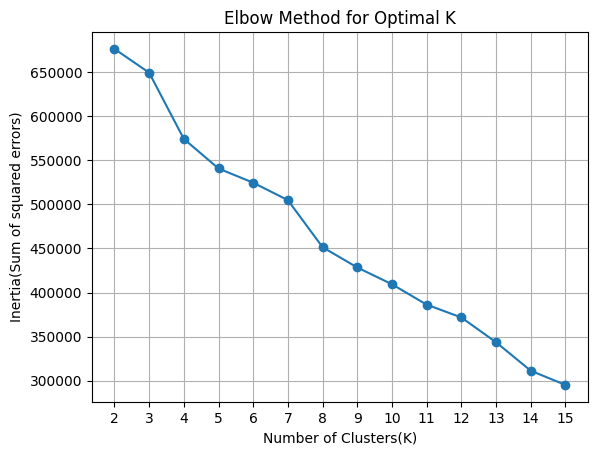

In [95]:
plt.figure(figure=(10,6))
plt.plot(possible_k_values,inertia_values,marker='o',linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Inertia(Sum of squared errors)')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

For K=2, the average silhouette_score is: 0.4597
For K=3, the average silhouette_score is: 0.2087
For K=4, the average silhouette_score is: 0.2165
For K=5, the average silhouette_score is: 0.2260
For K=6, the average silhouette_score is: 0.2270
For K=7, the average silhouette_score is: 0.2750
For K=8, the average silhouette_score is: 0.3061
For K=9, the average silhouette_score is: 0.3065
For K=10, the average silhouette_score is: 0.3070
For K=11, the average silhouette_score is: 0.3074
For K=12, the average silhouette_score is: 0.3081
For K=13, the average silhouette_score is: 0.3081
For K=14, the average silhouette_score is: 0.3068
For K=15, the average silhouette_score is: 0.3079


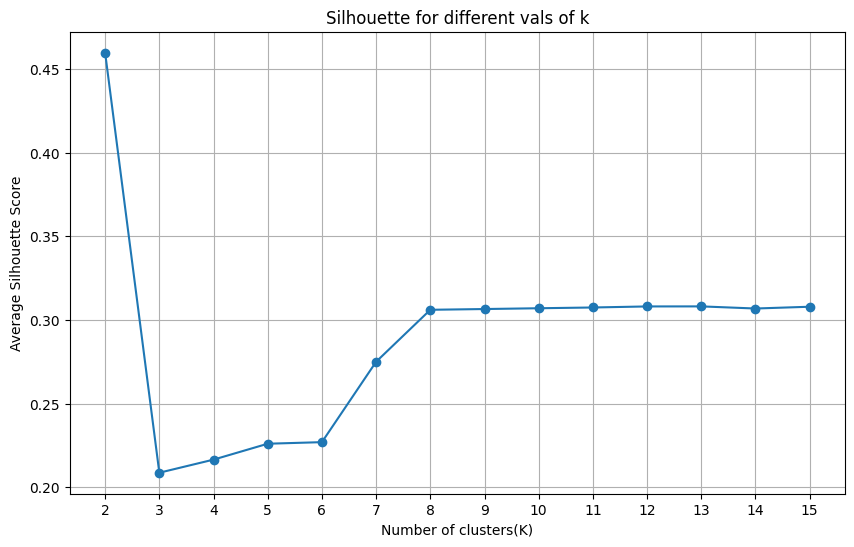

In [96]:
from sklearn.metrics import silhouette_score

silhouette_scores=[]

for k in possible_k_values:
    if k<2: continue
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42, n_init='auto')
    cluster_labels=kmeans.fit_predict(wallet_features_scaled_df)
    silhouette_avg=silhouette_score(wallet_features_scaled_df,cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For K={k}, the average silhouette_score is: {silhouette_avg:.4f}")

plt.figure(figsize=(10,6))
plt.plot(possible_k_values,silhouette_scores,marker='o',linestyle='-')
plt.title('Silhouette for different vals of k')
plt.xlabel('Number of clusters(K)')
plt.ylabel('Average Silhouette Score')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

## The silhouette score at K=3 is outstanding and indicates very distinct, well-separated clusters. This is usually a strong sign of a good clustering structure.

In [97]:
OPTIMAL_K=3

kmeans_final=KMeans(n_clusters=OPTIMAL_K,init='k-means++',random_state=42,n_init='auto')
wallet_features_scaled_df['cluster']=kmeans_final.fit_predict(wallet_features_scaled_df)


In [98]:
wallet_features_analysis = wallet_features_numeric.copy()
wallet_features_analysis['cluster']=wallet_features_scaled_df['cluster']


In [99]:
cluster_analysis=wallet_features_analysis.groupby('cluster').mean()

In [100]:
print(f"\n--- Cluster Analysis (Mean Feature Values for K={OPTIMAL_K}) ---")
# Transpose for better readability if there are many features
print(cluster_analysis.transpose())


--- Cluster Analysis (Mean Feature Values for K=3) ---
cluster                                         0             1              2
total_transactions                       0.965172      4.921194      33.066186
wallet_age_days                          2.263158     24.321120      98.715130
active_days                              0.753936      3.104447      11.141281
avg_txns_per_active_day                  0.627487      1.617675       2.527608
distinct_assets_used_count               0.587667      1.490656       2.311837
deposit_count                            0.067510      2.741851       4.457785
total_deposit_usd                      184.948808  12582.339658   77670.692762
avg_deposit_usd                        152.024771   3598.239394    8453.083013
max_deposit_usd                        161.869869   5952.261738   16183.158352
min_deposit_usd                        142.170099   2106.753804    3798.320910
distinct_assets_deposited_count          0.057252      1.316094       0.711

In [101]:
print(wallet_features_analysis['cluster'].value_counts().sort_index())

cluster
0    8384
1    6903
2    2357
Name: count, dtype: int64


In [102]:
key_features_to_compare = [
    'total_transactions',
    'wallet_age_days',
    'total_deposit_usd',
    'total_borrow_usd',
    'net_borrow_activity_usd',
    'repay_to_borrow_ratio_usd',
    'borrow_to_deposit_ratio_usd',
    'times_liquidates_count', # Typo fixed here if it was 'times_liquidates_count' earlier in your wallet_features
    'total_usd_liquidated_as_liquidatee',
    'percentage_small_usd_txns',
    'days_since_last_activity'
]

In [103]:
print(cluster_analysis[key_features_to_compare].transpose())

cluster                                         0             1              2
total_transactions                       0.965172      4.921194      33.066186
wallet_age_days                          2.263158     24.321120      98.715130
total_deposit_usd                      184.948808  12582.339658   77670.692762
total_borrow_usd                       228.919244    387.792034  123037.147440
net_borrow_activity_usd                  1.865158     24.468859   11627.551666
repay_to_borrow_ratio_usd                0.031044      0.061143       0.873089
borrow_to_deposit_ratio_usd              0.000000      0.203804      30.393768
times_liquidates_count                   1.921279      0.105027       1.656343
total_usd_liquidated_as_liquidatee  122778.788400   1520.357574   72475.687923
percentage_small_usd_txns                0.149763      0.254359       0.222748
days_since_last_activity               270.704966    250.792607      80.418140


In [104]:
# Based on our interpretation:
# Cluster 1: Very Low Credit (highest avg USD liquidated, very low repay ratio)
# Cluster 0: Low-Medium Credit (active borrowers, high borrow ratio, some liquidations)
# Cluster 2: Medium-High Credit (whales, repay well but high liquidation frequency)

score_mapping = {
    1: 20,  # Lowest score
    0: 50,  # Middle score
    2: 75   # Highest score for these segments
}

In [105]:
wallet_features_analysis['credit_score'] = wallet_features_analysis['cluster'].map(score_mapping)


In [106]:
print(wallet_features_analysis[['cluster', 'credit_score']].head())

                                            cluster  credit_score
wallet                                                           
0x504af2b739bd8cc1781933467ebb0fba59e182a5        1            20
0xcf9060b126ed8995403d876e0f0bc3a1237bd8f9        2            75
0xfa5d94a3baf66f0248b2b0d545964f71c6ea8844        1            20
0xa16b9ff1793abe554a26a4a87fc9ba0533bd2d82        0            50
0x2501dec16135d6b634f99bdeb3a0ee2123ed87c6        1            20


In [107]:
top_1000_wallets = wallet_features_analysis.sort_values(by=['credit_score', 'total_deposit_usd'], ascending=[False, False]).head(1000)

In [108]:
output_csv_df = top_1000_wallets[['credit_score']].reset_index()
output_csv_df.columns = ['Wallet', 'CreditScore']

## TOP 1000 WALLETS ASSIGNED BY STATIC KMEANS JUST FOR EXPLORING

In [109]:
csv_filename = "top_1000_wallet_scores.csv"
output_csv_df.to_csv(csv_filename, index=False)

In [110]:
print(output_csv_df.head())

                                       Wallet  CreditScore
0  0x37acfef331e6063c8507c2a69c97b4f78c770a5a           75
1  0xc1852f917835a9f2f97112672bc5c8afd1f21dc3           75
2  0x3584ca77ba08bd8b3fe4762e60eb284e37696829           75
3  0xdf63be2e473ba04c26b1609e51d08cf0d78e0913           75
4  0x0e0ec712b3912b5601216455a158cf18152cb62a           75


## BUILDING A HEURISTIC RULE BASED WEIGHT MODEL FOR CALCULATING VARIABLE SCORES INSTEAD OF USING KMEANS

In [111]:
wallet_features_numeric_capped = wallet_features_numeric.copy()

In [112]:
ratio_columns_to_cap = [
    'repay_to_borrow_ratio_usd',
    'borrow_to_deposit_ratio_usd',
    'withdraw_to_deposit_ratio_usd'
]

In [113]:
for col in ratio_columns_to_cap:
    
    print(f"\nDescriptive stats for {col}:")
    print(wallet_features_numeric_capped[col].describe(percentiles=[.01, .05, .95, .99]))


Descriptive stats for repay_to_borrow_ratio_usd:
count    17644.000000
mean         0.155306
std          1.714073
min          0.000000
1%           0.000000
5%           0.000000
50%          0.000000
95%          1.000682
99%          1.056270
max        218.082163
Name: repay_to_borrow_ratio_usd, dtype: float64

Descriptive stats for borrow_to_deposit_ratio_usd:
count    17644.000000
mean         4.139932
std        204.539929
min          0.000000
1%           0.000000
5%           0.000000
50%          0.000000
95%          0.562500
99%          4.424252
max      18933.167982
Name: borrow_to_deposit_ratio_usd, dtype: float64

Descriptive stats for withdraw_to_deposit_ratio_usd:
count    17644.000000
mean         3.639646
std        191.890851
min          0.000000
1%           0.000000
5%           0.000000
50%          0.000000
95%          1.252774
99%          7.181367
max      22921.978954
Name: withdraw_to_deposit_ratio_usd, dtype: float64


In [114]:
for col in ratio_columns_to_cap:
    
    lower_bound = wallet_features_numeric_capped[col].quantile(0.01)
    upper_bound = wallet_features_numeric_capped[col].quantile(0.99)
    
    print(f"For {col}: 1st percentile = {lower_bound:.4f}, 99th percentile = {upper_bound:.4f}")

    wallet_features_numeric_capped[col] = np.where(
        wallet_features_numeric_capped[col] < lower_bound, lower_bound, wallet_features_numeric_capped[col]
    )
    wallet_features_numeric_capped[col] = np.where(
        wallet_features_numeric_capped[col] > upper_bound, upper_bound, wallet_features_numeric_capped[col]
    )
    
    print(f"\nDescriptive stats for {col} AFTER capping:")
    print(wallet_features_numeric_capped[col].describe(percentiles=[.01, .05, .95, .99]))
    

For repay_to_borrow_ratio_usd: 1st percentile = 0.0000, 99th percentile = 1.0563

Descriptive stats for repay_to_borrow_ratio_usd AFTER capping:
count    17644.000000
mean         0.131918
std          0.322263
min          0.000000
1%           0.000000
5%           0.000000
50%          0.000000
95%          1.000682
99%          1.056052
max          1.056270
Name: repay_to_borrow_ratio_usd, dtype: float64
For borrow_to_deposit_ratio_usd: 1st percentile = 0.0000, 99th percentile = 4.4243

Descriptive stats for borrow_to_deposit_ratio_usd AFTER capping:
count    17644.000000
mean         0.110824
std          0.536266
min          0.000000
1%           0.000000
5%           0.000000
50%          0.000000
95%          0.562500
99%          4.407858
max          4.424252
Name: borrow_to_deposit_ratio_usd, dtype: float64
For withdraw_to_deposit_ratio_usd: 1st percentile = 0.0000, 99th percentile = 7.1814

Descriptive stats for withdraw_to_deposit_ratio_usd AFTER capping:
count    17644.

In [115]:
scaler = StandardScaler()

In [116]:
wallet_features_scaled_array_refined = scaler.fit_transform(wallet_features_numeric_capped)

In [117]:
wallet_features_scaled_df_refined = pd.DataFrame(
        wallet_features_scaled_array_refined,
        columns=wallet_features_numeric_capped.columns,
        index=wallet_features_numeric_capped.index
    )

In [118]:

print(f"Shape: {wallet_features_scaled_df_refined.shape}")
print("Head of refined scaled data:")
print(wallet_features_scaled_df_refined.head())

print("\nInfo of refined scaled data:")
wallet_features_scaled_df_refined.info()

print("\nNaN counts per column in refined scaled_df (should be 0):")
if wallet_features_scaled_df_refined.isnull().sum().any():
    print(wallet_features_scaled_df_refined.isnull().sum()[wallet_features_scaled_df_refined.isnull().sum() > 0])


print("\nDescriptive stats of refined scaled data (sample for first 5 columns):")
print(wallet_features_scaled_df_refined.describe().iloc[:, :5])

Shape: (17644, 42)
Head of refined scaled data:
                                            total_transactions  \
wallet                                                           
0x504af2b739bd8cc1781933467ebb0fba59e182a5            0.023624   
0xcf9060b126ed8995403d876e0f0bc3a1237bd8f9            0.417750   
0xfa5d94a3baf66f0248b2b0d545964f71c6ea8844           -0.055201   
0xa16b9ff1793abe554a26a4a87fc9ba0533bd2d82           -0.114320   
0x2501dec16135d6b634f99bdeb3a0ee2123ed87c6           -0.055201   

                                            wallet_age_days  active_days  \
wallet                                                                     
0x504af2b739bd8cc1781933467ebb0fba59e182a5         0.711827     0.119632   
0xcf9060b126ed8995403d876e0f0bc3a1237bd8f9        -0.455525    -0.262643   
0xfa5d94a3baf66f0248b2b0d545964f71c6ea8844         0.079389    -0.135218   
0xa16b9ff1793abe554a26a4a87fc9ba0533bd2d82        -0.459645    -0.262643   
0x2501dec16135d6b634f99bdeb3a0ee2

In [119]:
from sklearn.preprocessing import MinMaxScaler


feature_weights = {
    'wallet_age_days': 1.0,
    'active_days': 0.5,
    'total_deposit_usd': 0.5,
    'net_deposit_usd': 1.0,
    'repay_to_borrow_ratio_usd': 2.0,
    'borrow_to_deposit_ratio_usd': -1.5,
    'times_liquidates_count': -2.5, 
    'total_usd_liquidated_as_liquidatee': -1.0,
    'net_borrow_activity_usd': -1.0,
    'percentage_small_usd_txns': -0.5,
    'days_since_last_activity': -0.75,
    'distinct_assets_used_count': 0.25,
    'total_transactions': 0.25,
    'days_since_last_deposit': -0.2,
    'days_since_last_withdraw': -0.1,
    'days_since_last_borrow': -0.3,
    'days_since_last_repay': 0.4
}

In [120]:
raw_scores = pd.Series(0.0, index=wallet_features_scaled_df_refined.index)


In [121]:
print("\n--- Calculating Raw Scores ---")
missing_features_in_scaled_df = []
for feature, weight in feature_weights.items():
    raw_scores += wallet_features_scaled_df_refined[feature] * weight
    print(f"Applied weight {weight} to {feature}")


--- Calculating Raw Scores ---
Applied weight 1.0 to wallet_age_days
Applied weight 0.5 to active_days
Applied weight 0.5 to total_deposit_usd
Applied weight 1.0 to net_deposit_usd
Applied weight 2.0 to repay_to_borrow_ratio_usd
Applied weight -1.5 to borrow_to_deposit_ratio_usd
Applied weight -2.5 to times_liquidates_count
Applied weight -1.0 to total_usd_liquidated_as_liquidatee
Applied weight -1.0 to net_borrow_activity_usd
Applied weight -0.5 to percentage_small_usd_txns
Applied weight -0.75 to days_since_last_activity
Applied weight 0.25 to distinct_assets_used_count
Applied weight 0.25 to total_transactions
Applied weight -0.2 to days_since_last_deposit
Applied weight -0.1 to days_since_last_withdraw
Applied weight -0.3 to days_since_last_borrow
Applied weight 0.4 to days_since_last_repay


In [122]:
wallet_features_analysis = wallet_features_numeric_capped.copy()

In [123]:
wallet_features_analysis['cluster_original_kmeans'] = wallet_features_scaled_df['cluster']

In [124]:
wallet_features_analysis['raw_credit_score_refined'] = raw_scores

In [125]:
score_scaler = MinMaxScaler(feature_range=(0, 100))

wallet_features_analysis['credit_score'] = score_scaler.fit_transform(raw_scores.values.reshape(-1, 1))

In [126]:
print("\nGranular Credit Score Statistics (Based on Capped Ratios & Refined Scaling)")
print(wallet_features_analysis['credit_score'].describe())


Granular Credit Score Statistics (Based on Capped Ratios & Refined Scaling)
count    17644.000000
mean        58.050808
std          1.412944
min          0.000000
25%         57.522027
50%         58.032236
75%         58.418878
max        100.000000
Name: credit_score, dtype: float64


In [127]:
print("\nSample Wallets with Granular Credit Scores (Post-Capping & Refined Scaling)")
sample_columns_to_show = ['cluster_original_kmeans', 'credit_score', 'raw_credit_score_refined',
                          'times_liquidates_count', 'repay_to_borrow_ratio_usd', # These are from _numeric_capped (unscaled but capped)
                          'borrow_to_deposit_ratio_usd', 'wallet_age_days', 'total_deposit_usd']

existing_sample_columns = [col for col in sample_columns_to_show if col in wallet_features_analysis.columns]
print(wallet_features_analysis[existing_sample_columns].sample(10, random_state=42).transpose())


Sample Wallets with Granular Credit Scores (Post-Capping & Refined Scaling)
wallet                       0x7fcb7cdf64e3487c6177b284b49747e138a29980  \
cluster_original_kmeans                                        0.000000   
credit_score                                                  58.097714   
raw_credit_score_refined                                       0.160714   
times_liquidates_count                                         0.000000   
repay_to_borrow_ratio_usd                                      0.000000   
borrow_to_deposit_ratio_usd                                    0.000000   
wallet_age_days                                                0.000000   
total_deposit_usd                                              0.000000   

wallet                       0x68da29bebfbea330e07f04ce8b3db5912af72a9b  \
cluster_original_kmeans                                        1.000000   
credit_score                                                  58.020618   
raw_credit_score_refin

In [128]:
if 'credit_score' in wallet_features_analysis.columns:
    print("\nDescriptive Statistics for REVISED credit_score:")
    print(wallet_features_analysis['credit_score'].describe())

   
    cols_for_sample_view = [
        'credit_score', 'raw_credit_score_refined', 'cluster_original_kmeans', 
        'times_liquidates_count', 'total_usd_liquidated_as_liquidatee',
        'repay_to_borrow_ratio_usd', 'borrow_to_deposit_ratio_usd',
        'net_borrow_activity_usd', 'wallet_age_days', 'total_deposit_usd',
        'days_since_last_activity', 'percentage_small_usd_txns', 'total_transactions'
    ]
    existing_cols_for_sample = [col for col in cols_for_sample_view if col in wallet_features_analysis.columns]

    print("\n--- LOWEST Scoring Wallets (Bottom 5 based on new scores) ---")
    print(wallet_features_analysis.sort_values(by='credit_score').head(5)[existing_cols_for_sample].transpose())

    print("\n--- Wallets around 25th Percentile Score ---")
    percentile_25_score = wallet_features_analysis['credit_score'].quantile(0.25)
    print(f"(Score around: {percentile_25_score:.2f})")
    print(wallet_features_analysis[
              (wallet_features_analysis['credit_score'] >= percentile_25_score - 0.5) &
              (wallet_features_analysis['credit_score'] <= percentile_25_score + 0.5)
          ].head(3)[existing_cols_for_sample].transpose()) # Show 3 samples around this score

    print("\n--- Wallets around MEDIAN (50th Percentile) Score ---")
    median_score = wallet_features_analysis['credit_score'].median()
    print(f"(Score around: {median_score:.2f})")
    print(wallet_features_analysis[
              (wallet_features_analysis['credit_score'] >= median_score - 0.5) &
              (wallet_features_analysis['credit_score'] <= median_score + 0.5)
          ].head(3)[existing_cols_for_sample].transpose())

    print("\n--- Wallets around 75th Percentile Score ---")
    percentile_75_score = wallet_features_analysis['credit_score'].quantile(0.75)
    print(f"(Score around: {percentile_75_score:.2f})")
    print(wallet_features_analysis[
              (wallet_features_analysis['credit_score'] >= percentile_75_score - 0.5) &
              (wallet_features_analysis['credit_score'] <= percentile_75_score + 0.5)
          ].head(3)[existing_cols_for_sample].transpose())

    print("\n--- HIGHEST Scoring Wallets (Top 5 based on new scores) ---")
    print(wallet_features_analysis.sort_values(by='credit_score', ascending=False).head(5)[existing_cols_for_sample].transpose())

else:
    print("Error: 'credit_score' column not found in wallet_features_analysis. Please re-run scoring.")


Descriptive Statistics for REVISED credit_score:
count    17644.000000
mean        58.050808
std          1.412944
min          0.000000
25%         57.522027
50%         58.032236
75%         58.418878
max        100.000000
Name: credit_score, dtype: float64

--- LOWEST Scoring Wallets (Bottom 5 based on new scores) ---
wallet                              0x586e32930ac05127de429bd566eaa2758fcbd9bc  \
credit_score                                                      0.000000e+00   
raw_credit_score_refined                                         -1.988992e+02   
cluster_original_kmeans                                           2.000000e+00   
times_liquidates_count                                            2.040000e+02   
total_usd_liquidated_as_liquidatee                                2.132269e+07   
repay_to_borrow_ratio_usd                                         3.860819e-01   
borrow_to_deposit_ratio_usd                                       4.424252e+00   
net_borrow_activity_

In [129]:
wallet_good_features = pd.Series({
    'wallet_age_days': 200,       # Older
    'active_days': 50,          # Quite active
    'total_deposit_usd': 50000,
    'net_deposit_usd': 25000,     # Positive net deposit
    'repay_to_borrow_ratio_usd': 1.1, # Repaid > 100%
    'borrow_to_deposit_ratio_usd': 0.3, # Borrows 30% of deposits
    'times_liquidates_count': 0,        # No liquidations
    'total_usd_liquidated_as_liquidatee': 0,
    'net_borrow_activity_usd': -500,    # Overpaid borrows
    'percentage_small_usd_txns': 0.05,  # Few small txns
    'days_since_last_activity': 5,      # Recently active
    'distinct_assets_used_count': 3,
    'total_transactions': 100,
    'days_since_last_deposit': 10,
    'days_since_last_withdraw': 30,
    'days_since_last_borrow': 60,       # Borrowed a while ago
    'days_since_last_repay': 7,         # Repaid recently
    'deposit_count': 10, 'avg_deposit_usd': 5000, 'max_deposit_usd': 20000, 'min_deposit_usd': 100,
    'distinct_assets_deposited_count': 2, 'withdraw_count': 5, 'total_withdraw_usd': 25000,
    'avg_withdraw_usd': 5000, 'max_withdraw_usd': 10000, 'min_withdraw_usd': 500,
    'borrow_count': 5, 'total_borrow_usd': 15000, 'avg_borrow_usd': 3000, 'max_borrow_usd': 5000, 'min_borrow_usd': 1000,
    'distinct_assets_borrowed_count': 2, 'repay_count': 6, 'total_repay_usd': 15500,
    'avg_repay_usd': 2583, 'max_repay_usd': 5000, 'min_repay_usd': 1000,
    'withdraw_to_deposit_ratio_usd': 0.5, 'borrow_while_having_deposits_flag': 1, 'small_usd_txns_count': 5
})

# Profile 2: Potentially "Risky" Wallet
wallet_risky_features = pd.Series({
    'wallet_age_days': 30,        
    'active_days': 5,          
    'total_deposit_usd': 1000,
    'net_deposit_usd': -500,      
    'repay_to_borrow_ratio_usd': 0.2, 
    'borrow_to_deposit_ratio_usd': 5.0, 
    'times_liquidates_count': 5,       
    'total_usd_liquidated_as_liquidatee': 800, 
    'net_borrow_activity_usd': 4000,   
    'percentage_small_usd_txns': 0.6,   
    'days_since_last_activity': 100,   
    'distinct_assets_used_count': 1,
    'total_transactions': 20,
    'days_since_last_deposit': 90,
    'days_since_last_withdraw': 20,
    'days_since_last_borrow': 25,       # Borrowed somewhat recently
    'days_since_last_repay': 80,        # Repaid long ago
    'deposit_count': 2, 'avg_deposit_usd': 500, 'max_deposit_usd': 700, 'min_deposit_usd': 300,
    'distinct_assets_deposited_count': 1, 'withdraw_count': 3, 'total_withdraw_usd': 1500,
    'avg_withdraw_usd': 500, 'max_withdraw_usd': 600, 'min_withdraw_usd': 400,
    'borrow_count': 10, 'total_borrow_usd': 5000, 'avg_borrow_usd': 500, 'max_borrow_usd': 1000, 'min_borrow_usd': 50,
    'distinct_assets_borrowed_count': 1, 'repay_count': 2, 'total_repay_usd': 1000,
    'avg_repay_usd': 500, 'max_repay_usd': 600, 'min_repay_usd': 400,
    'withdraw_to_deposit_ratio_usd': 1.5, 'borrow_while_having_deposits_flag': 1, 'small_usd_txns_count': 12
})

# Profile 3: An "Average" or Mixed Profile Wallet
wallet_average_features = pd.Series({
    'wallet_age_days': 90,
    'active_days': 15,
    'total_deposit_usd': 5000,
    'net_deposit_usd': 1000,
    'repay_to_borrow_ratio_usd': 0.8, # Repaid 80%
    'borrow_to_deposit_ratio_usd': 1.0, # Borrows 100% of deposits (capped will affect this)
    'times_liquidates_count': 1,
    'total_usd_liquidated_as_liquidatee': 200,
    'net_borrow_activity_usd': 1000,    # Owes some
    'percentage_small_usd_txns': 0.2,
    'days_since_last_activity': 30,
    'distinct_assets_used_count': 2,
    'total_transactions': 40,
    'days_since_last_deposit': 20,
    'days_since_last_withdraw': 40,
    'days_since_last_borrow': 35,
    'days_since_last_repay': 32,
    'deposit_count': 5, 'avg_deposit_usd': 1000, 'max_deposit_usd': 2000, 'min_deposit_usd': 500,
    'distinct_assets_deposited_count': 1, 'withdraw_count': 4, 'total_withdraw_usd': 4000,
    'avg_withdraw_usd': 1000, 'max_withdraw_usd': 1500, 'min_withdraw_usd': 500,
    'borrow_count': 5, 'total_borrow_usd': 5000, 'avg_borrow_usd': 1000, 'max_borrow_usd': 2000, 'min_borrow_usd': 200,
    'distinct_assets_borrowed_count': 1, 'repay_count': 4, 'total_repay_usd': 4000,
    'avg_repay_usd': 1000, 'max_repay_usd': 1500, 'min_repay_usd': 500,
    'withdraw_to_deposit_ratio_usd': 0.8, 'borrow_while_having_deposits_flag': 1, 'small_usd_txns_count': 8
})

In [130]:
hypothetical_wallets_df = pd.DataFrame([wallet_good_features, wallet_risky_features, wallet_average_features])

In [131]:
hypothetical_wallets_df = hypothetical_wallets_df.reindex(columns=wallet_features_numeric_capped.columns, fill_value=0)

In [132]:
capping_bounds = {}
ratio_columns_to_cap = ['repay_to_borrow_ratio_usd', 'borrow_to_deposit_ratio_usd', 'withdraw_to_deposit_ratio_usd']
print("\nRecalculating capping bounds from original 'wallet_features_numeric' for testing hypothetical wallets:")
for col in ratio_columns_to_cap:
    if col in wallet_features_numeric.columns:
        lower = wallet_features_numeric[col].quantile(0.01)
        upper = wallet_features_numeric[col].quantile(0.99)
        capping_bounds[col] = {'lower': lower, 'upper': upper}
        print(f"Bounds for {col}: Lower={lower:.4f}, Upper={upper:.4f}")


Recalculating capping bounds from original 'wallet_features_numeric' for testing hypothetical wallets:
Bounds for repay_to_borrow_ratio_usd: Lower=0.0000, Upper=1.0563
Bounds for borrow_to_deposit_ratio_usd: Lower=0.0000, Upper=4.4243
Bounds for withdraw_to_deposit_ratio_usd: Lower=0.0000, Upper=7.1814


In [133]:
hypothetical_wallets_capped_df = hypothetical_wallets_df.copy()
for col, bounds_dict in capping_bounds.items():
    
    hypothetical_wallets_capped_df[col] = np.where(
        hypothetical_wallets_capped_df[col] < bounds_dict['lower'], bounds_dict['lower'], hypothetical_wallets_capped_df[col]
    )
    hypothetical_wallets_capped_df[col] = np.where(
        hypothetical_wallets_capped_df[col] > bounds_dict['upper'], bounds_dict['upper'], hypothetical_wallets_capped_df[col]
    )

In [134]:
hypothetical_wallets_scaled_array = scaler.transform(hypothetical_wallets_capped_df)
hypothetical_wallets_scaled_df = pd.DataFrame(hypothetical_wallets_scaled_array, columns=hypothetical_wallets_capped_df.columns)

In [135]:
current_test_weights = feature_weights

In [136]:
hypothetical_raw_scores = pd.Series(0.0, index=hypothetical_wallets_scaled_df.index)
for feature, weight in current_test_weights.items():
    if feature in hypothetical_wallets_scaled_df.columns:
        hypothetical_raw_scores += hypothetical_wallets_scaled_df[feature] * weight

In [137]:
hypothetical_final_scores_array = score_scaler.transform(hypothetical_raw_scores.values.reshape(-1, 1))

hypothetical_final_scores = pd.Series(hypothetical_final_scores_array.flatten(), index=hypothetical_raw_scores.index)

In [138]:
hypothetical_final_scores = hypothetical_final_scores.clip(0, 100)


In [139]:
print("\n--- Scores for Hypothetical Wallets (Simplified Scaling) ---")
hypothetical_results = pd.DataFrame({
    'Profile': ['Good', 'Risky', 'Average'], 
    'Raw_Score_Refined': hypothetical_raw_scores,
    'Final_Credit_Score (0-100)': hypothetical_final_scores
})

print(hypothetical_results)

print("\nFinal Credit Score (as float):")
print(hypothetical_results['Final_Credit_Score (0-100)'])

print("\nFinal Credit Score (rounded to whole number):")
print(hypothetical_results['Final_Credit_Score (0-100)'].round().astype(int))


--- Scores for Hypothetical Wallets (Simplified Scaling) ---
   Profile  Raw_Score_Refined  Final_Credit_Score (0-100)
0     Good          16.974872                   63.005101
1    Risky         -11.894504                   54.579274
2  Average           7.395888                   60.209375

Final Credit Score (as float):
0    63.005101
1    54.579274
2    60.209375
Name: Final_Credit_Score (0-100), dtype: float64

Final Credit Score (rounded to whole number):
0    63
1    55
2    60
Name: Final_Credit_Score (0-100), dtype: int32


In [141]:
wallet_features_analysis['raw_credit_score'] = raw_scores

In [142]:
wallet_features_analysis['credit_score'] = score_scaler.transform(
    wallet_features_analysis['raw_credit_score'].values.reshape(-1, 1)
)

In [143]:
wallet_features_analysis['credit_score'] = wallet_features_analysis['credit_score'].clip(0, 100)


In [145]:
print("\n--- Final Credit Score Statistics ---")
print(wallet_features_analysis['credit_score'].describe())

print("\n--- Sample Wallets with Final Credit Scores ---")

sample_display_cols = [
    'credit_score', 'raw_credit_score',
    'times_liquidates_count', 'repay_to_borrow_ratio_usd',
    'borrow_to_deposit_ratio_usd', 'wallet_age_days', 'total_deposit_usd'
]
sample_display_cols.insert(1, 'cluster_original_kmeans')
    
existing_display_cols = [col for col in sample_display_cols if col in wallet_features_analysis.columns]
print(wallet_features_analysis[existing_display_cols].sample(10, random_state=42).transpose())


--- Final Credit Score Statistics ---
count    17644.000000
mean        58.050808
std          1.412944
min          0.000000
25%         57.522027
50%         58.032236
75%         58.418878
max        100.000000
Name: credit_score, dtype: float64

--- Sample Wallets with Final Credit Scores ---
wallet                       0x7fcb7cdf64e3487c6177b284b49747e138a29980  \
credit_score                                                  58.097714   
cluster_original_kmeans                                        0.000000   
raw_credit_score                                               0.160714   
times_liquidates_count                                         0.000000   
repay_to_borrow_ratio_usd                                      0.000000   
borrow_to_deposit_ratio_usd                                    0.000000   
wallet_age_days                                                0.000000   
total_deposit_usd                                              0.000000   

wallet                   

In [146]:
secondary_sort_col = 'total_deposit_usd' 

top_1000_wallets_final = wallet_features_analysis.sort_values(
    by=['credit_score', secondary_sort_col],
    ascending=[False, False]
).head(1000)

In [147]:
output_csv_final_df = top_1000_wallets_final[['credit_score']].reset_index()
output_csv_final_df.rename(columns={'wallet': 'Wallet', 'credit_score': 'CreditScore'}, inplace=True)

In [148]:
output_csv_final_df['CreditScore'] = output_csv_final_df['CreditScore'].round().astype(int)

In [149]:
csv_filename_final = "top_1000_wallet_scores_final.csv" 
output_csv_final_df.to_csv(csv_filename_final, index=False)

In [150]:
print(f"\nTop 1,000 wallet final scores saved to {csv_filename_final}")
print("Sample of final CSV output (scores as whole numbers):")
print(output_csv_final_df.head())

print(f"\n'wallet_features_analysis' DataFrame now contains the final 'credit_score' (0-100 float).")


Top 1,000 wallet final scores saved to top_1000_wallet_scores_final.csv
Sample of final CSV output (scores as whole numbers):
                                       Wallet  CreditScore
0  0xc1852f917835a9f2f97112672bc5c8afd1f21dc3          100
1  0x37acfef331e6063c8507c2a69c97b4f78c770a5a           94
2  0x0f3c2476fbf0ed09dff00ea7f4ef252dcc72e6f1           83
3  0x402a75f3500ca1fba17741ec916f07a0c9db195d           77
4  0xf859a1ad94bcf445a406b892ef0d3082f4174088           72

'wallet_features_analysis' DataFrame now contains the final 'credit_score' (0-100 float).


## PLEASE NOTE THAT THE OUTPUT FROM OUR FINAL HEURISTIC DEPENDS ON THE DATA DISTRIBUTION 

## THE 3 LARGEST FILES I CHOSE HAD LOW STD DEVIATION AND MAJORITY WAS IN THE AVG RANGE , THIS WILL VARY WITH DIFFERENT DATA